IRIS dataset.

The dataset given is an IRIS dataset which contains five variables namely:

1.SepalLength(Cm)
2.SepalWidth(Cm)
3.PetalLength(Cm)
4.PetalWidth(Cm)
5.Species

So, what we are going to do is perform Linear Regression on the dataset using python and taking Sepal Length as Response or dependent variable and rest of the variables as independent ones.

Okay, So before proceeding with Linear Regression, we are going to check the following.
1- Whether there exists any multicollinearity in the independent variables with correlation matrix and suitable scatter plots.
2- Find the correlation between dependent variable and each independent variable.
3- Find if there is any outlier in the variables given with suitable boxplots.

And ultimately give the inputs.

In [4]:
#Import all the important packages.

import pandas as pd
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [9]:
#Without haste, lets load the dataset.

url = 'C:/Users/Nikhil Jain/Desktop/Code/Linear Regression/UPX'
df = pd.read_csv(url + '/iris.csv')

In [14]:
#Print and check first 5 data.

df.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Okay, so with describe method, we can come to the conclusion that there is not much of a difference between min and max value. Also, mean and median seem to be almost identical which imparts that there is not much of a standard deviation. Again, lets go with pandas profiling and see more about any warnings.

In [17]:
import pandas_profiling
report = pandas_profiling.ProfileReport(df)
report.to_file('iris.html')

On doing the profiling, it can be inferred that there is 1 duplicate row which I am assuming that for certain data, value might be same. Apart from that Petal.Width is highly Correlated with Petal.Length.

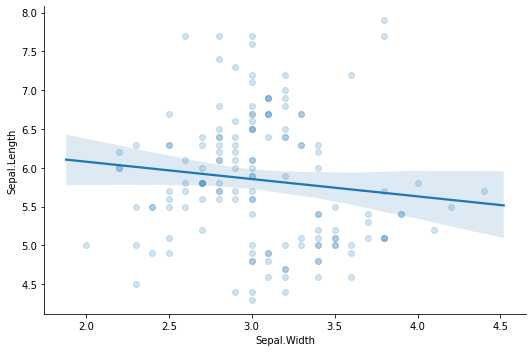

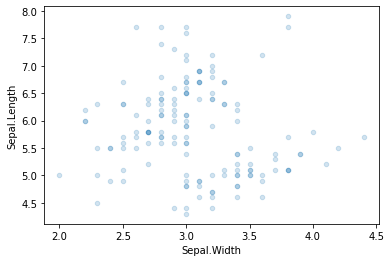

In [13]:
# So we have successfuly loaded the dataset.

#Let's explore the relationship between Sepal Length and other independent variables.

sns.lmplot(x='Sepal.Width', y='Sepal.Length', data=df, aspect=1.5, scatter_kws={'alpha':0.2})
df.plot(kind='scatter', x='Sepal.Width', y='Sepal.Length',alpha=0.2)

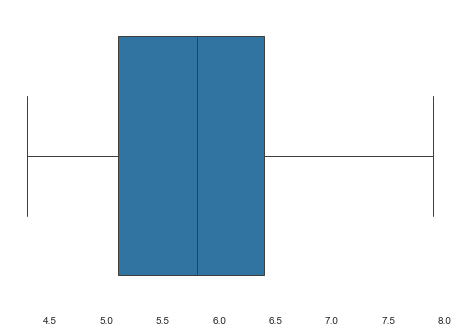

In [18]:
sns.boxplot(df[['Sepal.Length']], data=df, linewidth=1)
plt.show()

In [19]:
#Checking the relationship between Sepal Width and Sepal Length

input_cols = ['Sepal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]

#Creating the Linear Regression Model

linreg = LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)
print(linreg.coef_)

[6.52622255]
[[-0.22336106]]


In [20]:
#Checking the relationship between Petal Width and Sepal Length

input_cols = ['Petal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]

#Creating Linear Regression Model

linreg = LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)
print(linreg.coef_)

[4.77762942]
[[0.88858025]]


In [21]:
#Checking the relationship between Petal Length and Sepal Length

input_cols = ['Petal.Length']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]

#Creating Linear Regression Model

linreg = LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)
print(linreg.coef_)

[4.30660342]
[[0.40892228]]


In [22]:
#Checking the relationship between Petal Width, Petal Length, Sepal Width and Sepal Length

input_cols = ['Petal.Width', 'Petal.Length', 'Sepal.Width']
output_variable = ['Sepal.Length']
X = df[input_cols]
Y = df[output_variable]

#Creating Linear Regression Model

linreg = LinearRegression()
linreg.fit(X,Y)
print(linreg.intercept_)
print(linreg.coef_)

[1.85599749]
[[-0.55648266  0.70913196  0.65083716]]


In [23]:
#Check for multicollinearity

corr = np.corrcoef(X , rowvar = 0)
corr

array([[ 1.        ,  0.96286543, -0.36612593],
       [ 0.96286543,  1.        , -0.4284401 ],
       [-0.36612593, -0.4284401 ,  1.        ]])

In [24]:
print(np.linalg.det(corr))

0.05735702290426796


In [25]:
y = df['Sepal.Length']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = False)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 3)
(105,)
(45, 3)
(45,)


In [33]:
#Building the linear model with the algorithm

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)

In [34]:
#Coefficient of determination or R squared value

model.score(X_train, y_train)

0.8823780846396122

In [35]:
print(model.intercept_)
print(model.coef_)

1.81652243934015
[-0.6799173   0.76805423  0.6473215 ]


In [36]:
## Predicting the x_test with the model
predicted=model.predict(X_test)

In [37]:
## RMSE(Root Mean Squared Error)
print(np.sqrt(metrics.mean_squared_error(y_test,predicted)))

0.34150620776255614


In [38]:
## R Squared value or coefficient of determination
print(metrics.r2_score(y_test,predicted))

0.7539294801520866


In [39]:
## Mean Absolute Error
print(metrics.mean_absolute_error(y_test,predicted))

0.2720924197284202


In [40]:
#Compute null RMSE
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())
y_null

array([5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895, 5.78157895, 5.78157895,
       5.78157895, 5.78157895, 5.78157895])

In [41]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.9287386078235629